In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
pd.options.mode.chained_assignment = None
%matplotlib inline

## Data consolidation
Player statistics are stored season by season from 2014-15 to 2019-20 in csv files in data folder. We consolidate data from all files in one data frame

In [2]:
os.chdir("./data")
df_main=pd.DataFrame()

#Consolidating data of all 5 csv into one dataframe
#Additonally, adding an Year filed for further analysis
for f in glob.glob('*.csv'):
    df_temp = pd.read_csv(f,index_col=0)
    df_temp["Year"]=f[0:-4]
    df_main = df_main.append(df_temp, ignore_index=True)


display(df_main.head())

,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,...,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain,Year
0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,...,0.196473,0.730414,F S,148,33,4,0,6.878173,27.805155,2014-2015
1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,...,0.136356,0.517051,F M S,112,27,4,0,5.549699,16.488439,2014-2015
2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,...,0.194183,0.616397,F S,76,41,8,0,5.276973,21.365790,2014-2015
3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,...,0.074525,0.411580,F,131,23,4,1,3.041321,13.718276,2014-2015
4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,...,0.257660,0.384952,F M S,122,82,4,0,10.736753,27.157572,2014-2015


### Data preprocessing

#### Part 1: Checking for missing values

In [3]:
cols=df_main.columns
num_cols = df_main._get_numeric_data().columns
categorical_cols=list(set(cols) - set(num_cols))
print("Null values in categorical columns")
categorical_cols
print(df_main[categorical_cols].isnull().sum())
print(f"Total records in the dataframe {df_main.shape[0]}")
df_main.describe()

Null values in categorical columns
Year                0
teams_played_for    0
league              0
position            0
player_name         0
dtype: int64
Total records in the dataframe 15835


,games,minutes_played,goals,npg,assists,xG,xA,npxG,xG90,xA90,npxG90,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain
count,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000,15835.000000
mean,19.078055,1353.993053,1.816040,1.656520,1.273571,1.857392,1.305045,1.699732,0.136634,0.092785,0.128523,17.226902,12.762488,2.756299,0.142911,2.839344,4.851395
std,11.294617,988.617352,3.465752,3.081529,2.049515,3.170429,1.834830,2.791986,0.376238,0.314331,0.370261,22.162948,15.884216,2.791868,0.390909,3.093896,5.266651
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,437.000000,0.000000,0.000000,0.000000,0.082106,0.064196,0.081771,0.012273,0.008143,0.012213,2.000000,1.000000,0.000000,0.000000,0.547589,0.976102
50%,20.000000,1260.000000,0.000000,0.000000,0.000000,0.678697,0.589325,0.662080,0.056158,0.052031,0.054164,9.000000,7.000000,2.000000,0.000000,1.941877,3.265872
75%,29.000000,2171.000000,2.000000,2.000000,2.000000,2.174913,1.818488,2.051100,0.167209,0.122762,0.157152,24.000000,19.000000,4.000000,0.000000,4.053147,6.973745
max,38.000000,3420.000000,48.000000,38.000000,20.000000,39.308761,20.620707,32.117727,22.952204,18.232366,22.952204,227.000000,146.000000,17.000000,5.000000,28.058852,54.753610


As we can see, none of the categorical columns have missing values. Further, all numeric columns have same number of records as total records in the dataframe which means numeric columns too do not have any missing values

#### Part 2: Data filtering


Before we analyze data, we would remove player records with following conditions:
1. Players that played for multiple clubs in top 5 leagues in the same season (due to a loan deal or permanent transfer in winter transfer window). This is because the dataset only proveds overall season record and does not break it down by respective teams the player played for


2. Players that played for <=600 minutes

In [4]:
#Filtering out players who played for two clubs in same season
df_main=df_main[df_main['teams_played_for'].apply((lambda x: False if(len(x.split(",")))>1 else True) )]  

#Filtering out players who played less than 600 minutes
df_main=df_main[df_main['minutes_played']>=600] 
display(df_main)

,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,xA,...,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain,Year
0,Sergio Agüero,Manchester City,EPL,33,2551,26,21,8,25.270160,5.568922,...,0.196473,0.730414,F S,148,33,4,0,6.878173,27.805155,2014-2015
1,Harry Kane,Tottenham,EPL,34,2589,21,19,4,17.157292,3.922501,...,0.136356,0.517051,F M S,112,27,4,0,5.549699,16.488439,2014-2015
2,Diego Costa,Chelsea,EPL,26,2111,20,19,3,15.219104,4.554671,...,0.194183,0.616397,F S,76,41,8,0,5.276973,21.365790,2014-2015
3,Charlie Austin,Queens Park Rangers,EPL,35,3078,18,15,5,17.881850,2.548747,...,0.074525,0.411580,F,131,23,4,1,3.041321,13.718276,2014-2015
4,Alexis Sánchez,Arsenal,EPL,35,2967,16,16,8,13.451750,8.494180,...,0.257660,0.384952,F M S,122,82,4,0,10.736753,27.157572,2014-2015
5,Olivier Giroud,Arsenal,EPL,27,1871,14,14,3,8.846344,3.860136,...,0.185683,0.425532,F S,70,29,5,1,4.129247,13.639880,2014-2015
6,Eden Hazard,Chelsea,EPL,38,3389,14,11,9,12.016092,11.238891,...,0.298466,0.238249,M,78,100,2,0,19.476321,31.840571,2014-2015
7,Saido Berahino,West Bromwich Albion,EPL,38,2940,14,10,1,13.841753,1.961661,...,0.060051,0.330524,F M S,86,28,2,0,2.439558,11.907294,2014-2015
8,Christian Benteke,Aston Villa,EPL,29,2380,13,12,2,8.455074,2.921320,...,0.110470,0.290946,F S,80,33,1,1,2.198609,8.725396,2014-2015
9,David Silva,Manchester City,EPL,32,2682,12,12,7,9.096988,10.388413,...,0.348604,0.305268,M,66,92,8,0,16.633573,29.144278,2014-2015


## Part 1: Which league has the most attacking defenders across Europe's top 5 league in the last 6 seasons?

Text(0.5,1,'Total goals+assists per 90 by defenders from season 14-15 to 19-20')

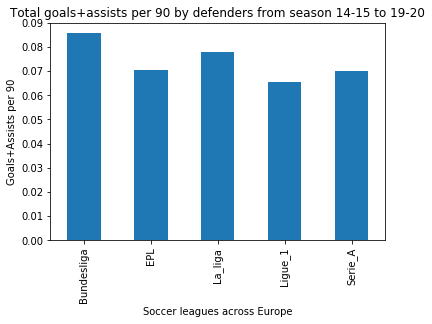

In [5]:
#Finding all players who are defenders
df_defenders=df_main[df_main["position"]=='D']

#Finding total goals + assists per 90 mins for all defenders
df_defenders["g+a"]=df_defenders["goals"]+df_defenders["assists"]
df_defenders["g+a per 90"]=(df_defenders["g+a"]/df_defenders['minutes_played'])*90

##Finding average goals+assist per 90 for defenders in each league
df_ga_per90=df_defenders.groupby(['league'])["g+a per 90"].mean()
plt.figure()
df_ga_per90.plot.bar()
plt.xlabel("Soccer leagues across Europe")
plt.ylabel("Goals+Assists per 90")
plt.title("Total goals+assists per 90 by defenders from season 14-15 to 19-20")


Bundesliga seems to be the league with most attack minded defenders. Serie A's defenders had third highest goals+assits per 90 min contribution which is surprising since this league is considered to be most defensive in Europe among top 5 leagues

Text(0.5,1,'Total goals+assists per 90 by defenders for each season from 14-15 to 19-20')

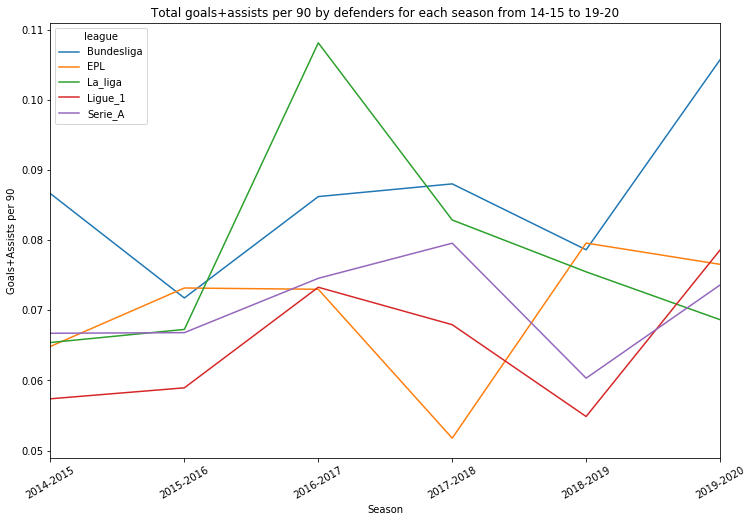

In [6]:
#Finding goals+assists per 90 by defenders for each league across 5 seasons from 2014-15 to 2019-20
df_ga_per90_league=df_defenders.groupby(['Year','league'])["g+a per 90"].mean()

plot_df = df_ga_per90_league.unstack('league')


plot_df.plot(figsize=(12,8))
plt.xlabel("Season")
plt.ylabel("Goals+Assists per 90")

plt.xticks(rotation=30)

plt.title("Total goals+assists per 90 by defenders for each season from 14-15 to 19-20")

2016–17 season in La liga that saw the most goal and assists contributions per 90 mins by the defenders.

## Part 2 - Expectation vs Reality: Which teams outperformed their expected goals measure and which teams underperformed? How is related to performance in the league in that year?

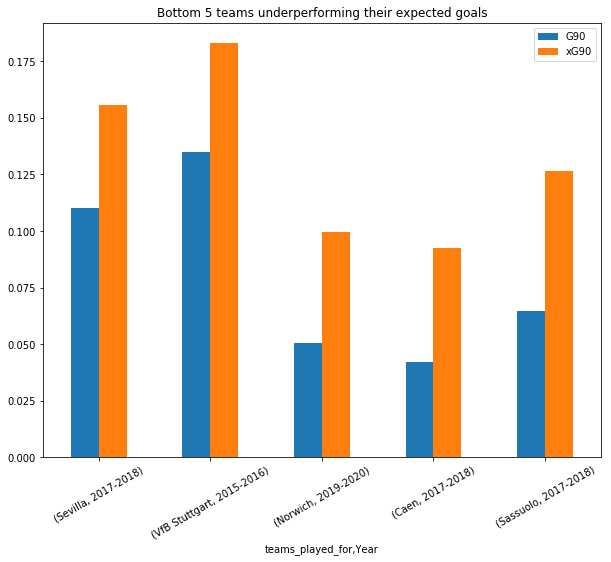

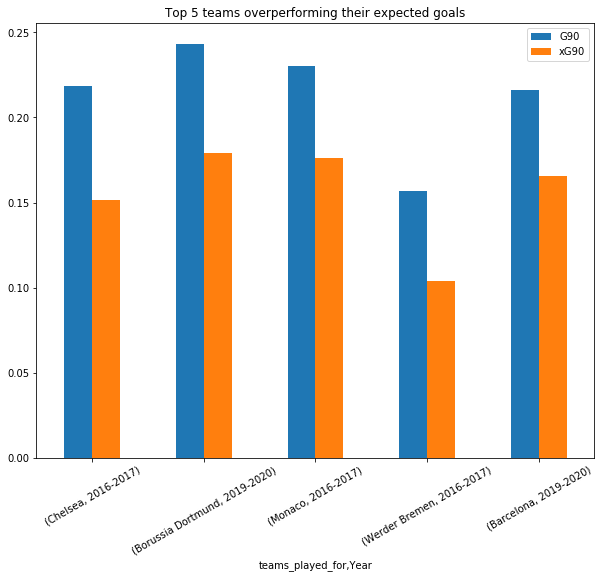

In [7]:
#Finding goals per 90 mins for all players
df_filter_tg=df_main.copy()
df_filter_tg['G90']=(df_main['goals']/df_main['minutes_played'])*90

#Finding goals and expected goals per 90 min for each team in last 5 years
df_teams=df_filter_tg.groupby(['teams_played_for','Year'])[["G90","xG90"]].mean()

#Finding difference of goals and expected goals per 90 mins for each team in last 5 years
df_teams['diff']=df_teams["G90"]-df_teams["xG90"]
df_teams=df_teams.sort_values(by='diff', ascending=False)

#Finding bottom 5 teams underperforming their expected goals measure
df_teams[["G90","xG90"]].tail().plot.bar(rot=30,figsize=(10,8))
plt.title("Bottom 5 teams underperforming their expected goals")

#Finding top 5 teams overperforming their expected goals measure
df_teams[["G90","xG90"]].head().plot.bar(rot=30,figsize=(10,8))
plt.title("Top 5 teams overperforming their expected goals")

df_teams_out_prfm=df_teams[df_teams["diff"]>=0.025]
df_teams_out_prfm=df_teams_out_prfm.reset_index()
v = df_teams_out_prfm.teams_played_for.value_counts()

Among bottom 5 teams that underperformed their expected goals measure, Norwich and Stuttgart were relegated while Caen survived relegation by just 2 positions. Thus, not taking great chances of scoring goals can led to teams being relegated.

Text(0.5,1,'Distribution of diff between actual and expected goals per 90 for teams across top 5 leagues from 2014-15 to 2019-20')

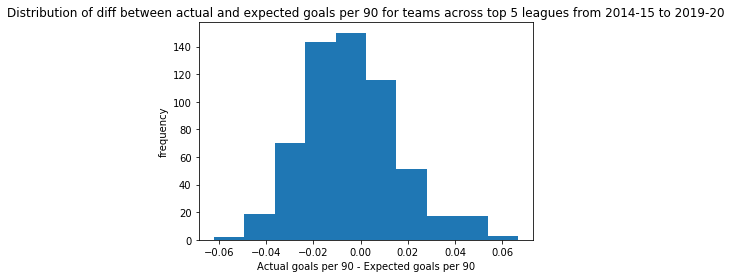

In [8]:
plt.hist(df_teams["diff"])
plt.xlabel("Actual goals per 90 - Expected goals per 90")
plt.ylabel("frequency")
plt.title("Distribution of diff between actual and expected goals per 90 for teams across top 5 leagues from 2014-15 to 2019-20")

In [23]:
#Finding teams that outperformed their expected goals measure
#per 90 mins by a difference of 0.025
df_teams_out_prfm=df_teams[df_teams["diff"]>=0.025]
df_teams_out_prfm=df_teams_out_prfm.reset_index()
v = df_teams_out_prfm.teams_played_for.value_counts()
v[v.values>1]

Real Madrid          3
Bayern Munich        3
Juventus             3
Liverpool            2
Borussia Dortmund    2
Werder Bremen        2
Hoffenheim           2
Napoli               2
Monaco               2
Barcelona            2
Name: teams_played_for, dtype: int64

## Part 3 - Which teams were most dependent on a single player?: a Gini coefficient analysis

In [9]:
#Function to calculate gini coefficient. Taken from: https://github.com/oliviaguest/gini

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""

    array = array.flatten() 
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) 

In [24]:
def plot_gini_league(df_main,league,year):
    """
    Function to plot gini coefficent of expected goals chain distribution
    for all teams in a league in a season
    
    Arguments:
    df_main: Dataframe with player records
    league: Name of the league (string)
    year: Year (string)
    
    Ouput:
    A horizontal bar plot 
    """
    
    #Extracting dataframe with all players' statistics in a league in 
    #a particular season
    df_league=df_main[(df_main["league"]==league) & (df_main["Year"]==year)]
    
    #Finding all teams in the league
    teams=list(df_league["teams_played_for"].value_counts().index)
    
    #Initializing a list to contain tuples of team name and respective 
    #gini coefficients
    list_val_gini=[]    
    
    #Finding expected goals chain per 90 for all players
    df_league["xGChain90"]=(df_league["xGChain"]/df_league["minutes_played"])*90

    #Finding gini coeffcient for each team in the league in that year
    for team in teams:
    
       
        df_team_season=df_league[(df_league["teams_played_for"]==team)]
        
        val_gini=gini(np.array(df_team_season["xGChain90"].values))
        list_val_gini.append((team,val_gini))
    
    #Sorting gini coefficents for each team in descending order
    list_val_gini.sort(key=lambda x: x[1], reverse=False)
    
    #Extracting team names and gini coefficents from sorted tuple
    team_list = list(zip(*list_val_gini))[0]
    gini_list = list(zip(*list_val_gini))[1]

    
    plt.figure(figsize=(15,10))
    plt.barh(team_list, gini_list,align='center')
    
    plt.xlabel("Gini coefficient")   
    plt.ylabel("Teams")
    plt.title(f"Gini coefficients calculated from expected goals chain per 90 mins distribution for teams in {league} in season {year}")


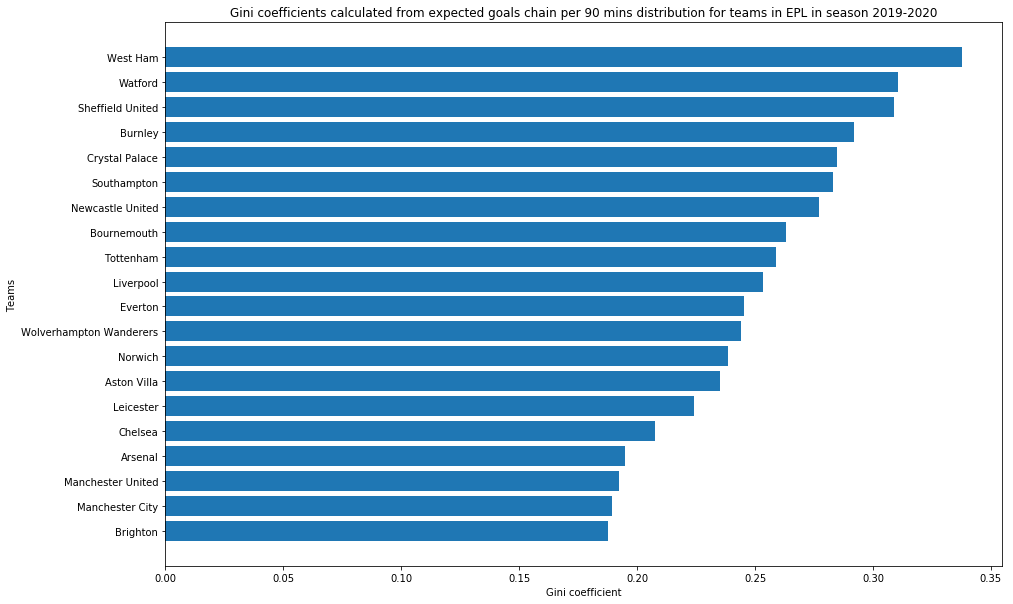

In [25]:
plot_gini_league(df_main,"EPL","2019-2020")

Based on above plot, West Ham is the team most dependent on few players owing as indicated by a high Gini coefficient. We can look further into their expected goals chain per 90 mins distribution:

In [26]:
def plot_xGC90_team(df_main,team,year):
    
    """
    Function to plot expected goals chain per 90 distribution for a team
    in a particular season
    
    Arguments: 
    df_main: Dataframe with player records
    team: Team name (string) 
    year: Year (string)
    
    Returns:
    Bar plot of expected goals chain distribution per 90 of given team
    """
    
    
    df_team=df_main[(df_main["teams_played_for"]==team) & (df_main["Year"]==year)]
    df_team["xGChain90"]=(df_team["xGChain"]/df_team["minutes_played"])*90
    df_team=df_team.sort_values(by="xGChain90", ascending=False)
    plt.figure(figsize=(15,10))
    plt.bar(df_team["player_name"],df_team["xGChain90"],align='center')
    plt.ylim([0,df_team["xGChain90"].max()+0.1])
    plt.ylabel("Gini coefficient")   
    plt.xlabel("Player name")
    plt.xticks(rotation=90)
    plt.title(f"Gini coefficent distribution for {team} in {year}")

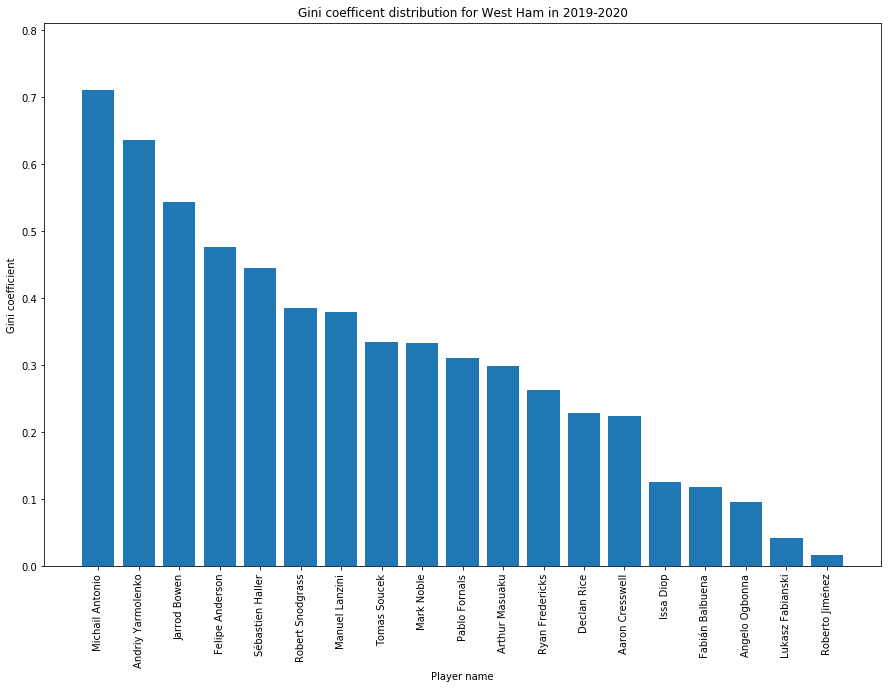

In [27]:
plot_xGC90_team(df_main,"West Ham","2019-2020")

As can be observed, West Ham are majorly dependent on Michail Antonio, Andriy Yarmalenko and Jared Bowen for scoring goals. Further, lets look at the same distribution for another team with low Gini coefficent, say Manchester City

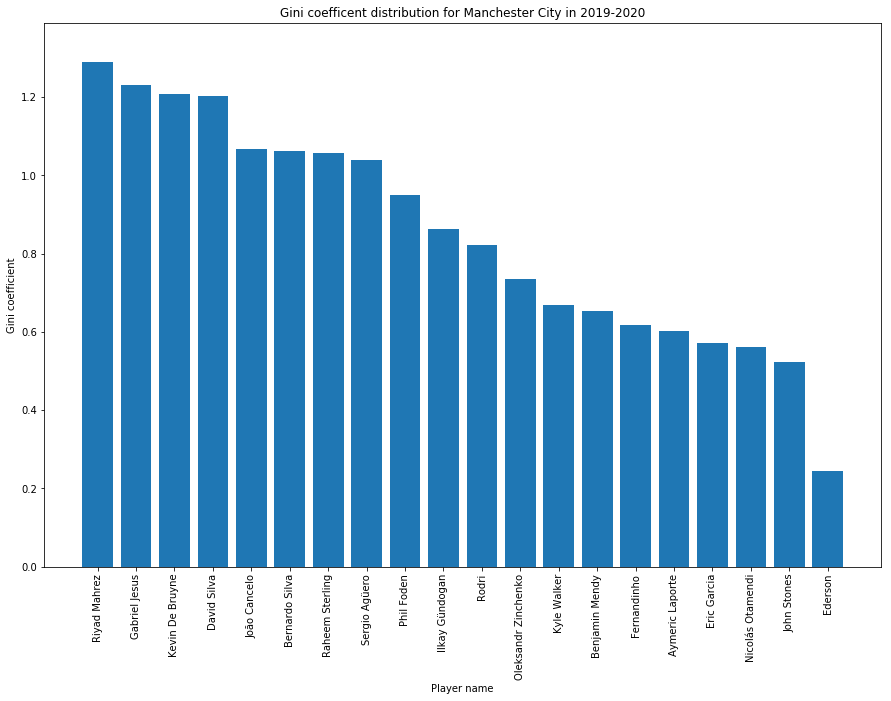

In [29]:
plot_xGC90_team(df_main,"Manchester City","2019-2020")

Many players like Riyad Mahrez, Gabriel Jesus, Kevin De Bruyne, David Silva and Joao Cancelo are involved in possessions leading to shots on goal. It also highlights the depth of Manchester City team.